In [38]:
import numpy as np
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

In [4]:
df = np.load("mnist_compressed.npz")
train_images = df['train_images']
train_labels = df['train_labels']
test_images = df['test_images']
test_labels = df['test_labels']

In [10]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 56)
(60000,)
(10000, 28, 56)
(10000,)


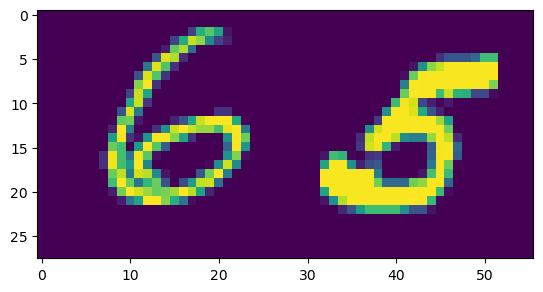

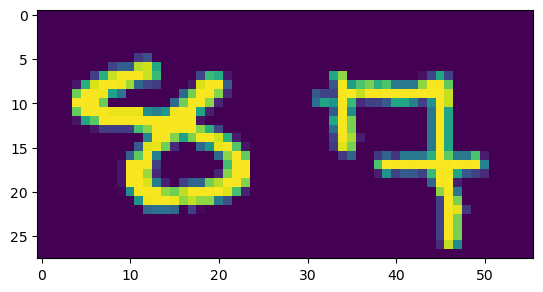

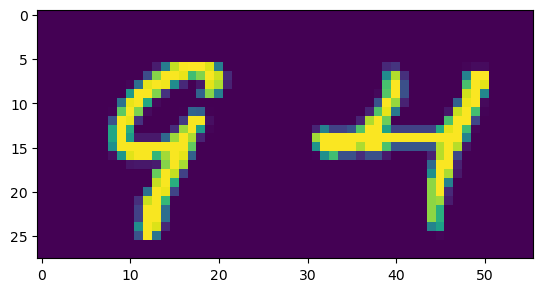

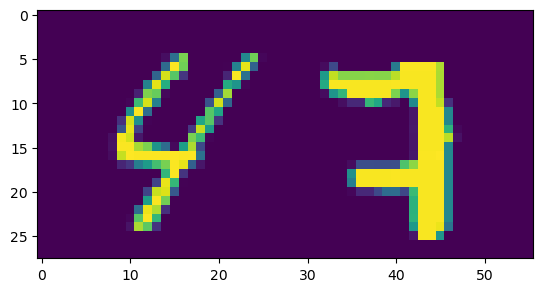

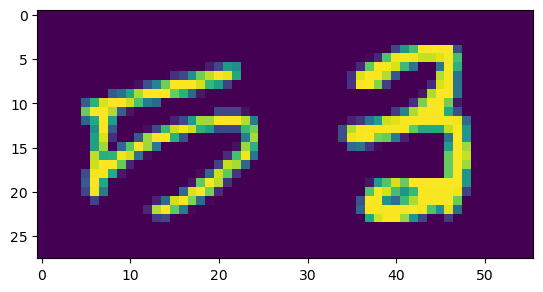

In [7]:
for i in range(0,5):
    n = random.randint(0,59999)
    plt.imshow(train_images[n], interpolation='nearest')
    plt.show()

In [75]:
layers = [tf.keras.Input(shape=(28,56,1)), Conv2D(8,5), MaxPool2D(), Conv2D(8,3), MaxPool2D(), Flatten(), Dense(1000, activation='relu'), Dense(100, activation= 'softmax')]
model = tf.keras.models.Sequential(layers)
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 52, 8)         208       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 12, 26, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 24, 8)         584       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 12, 8)          0         
 ng2D)                                                           
                                                                 
 flatten_20 (Flatten)        (None, 480)               0         
                                                                 
 dense_34 (Dense)            (None, 1000)            

In [76]:
n_epochs = 20
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=n_epochs, validation_data = (test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 27s 14ms/step - loss: 1.7040 - accuracy: 0.7131 - val_loss: 0.4036 - val_accuracy: 0.8783
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3128 - accuracy: 0.9060 - val_loss: 0.3002 - val_accuracy: 0.9150
Epoch 3/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2320 - accuracy: 0.9306 - val_loss: 0.2800 - val_accuracy: 0.9271
Epoch 4/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1937 - accuracy: 0.9417 - val_loss: 0.2934 - val_accuracy: 0.9237
Epoch 5/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1683 - accuracy: 0.9506 - val_loss: 0.2664 - val_accuracy: 0.9349
Epoch 6/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1485 - accuracy: 0.9571 - val_loss: 0.2711 - val_accuracy: 0.9375
Epoch 7/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1422 - accuracy: 0.9611 - val_loss: 0.2946 -


Accuracy on the final epoch of training was 98.14%


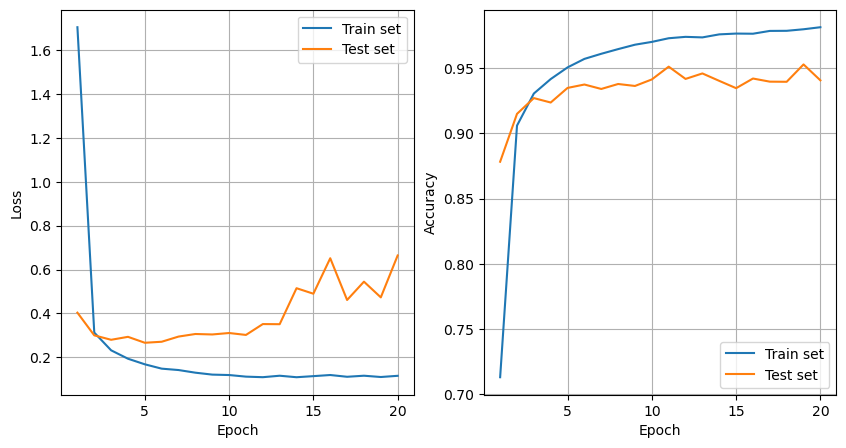

In [77]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, n_epochs+1), history.history['loss'], label='Train set')
plt.plot(np.arange(1, n_epochs+1), history.history['val_loss'], label='Test set')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, n_epochs+1), history.history['accuracy'], label='Train set')
plt.plot(np.arange(1, n_epochs+1), history.history['val_accuracy'], label='Test set')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
print(f"\nAccuracy on the final epoch of training was {100*history.history['accuracy'][-1]:0.2f}%")